In [1]:
#Load and import libraries & packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing

In [2]:
#Load dataset as a dataframe
users_df = pd.read_csv("takehome_users.csv", encoding = "ISO-8859-1")

users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
#Inspect columns for any missing data points and/or converting any data types
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
#Fill missing data points with 0 and convert creation time to datetime data type
users_df.last_session_creation_time.fillna(0, inplace=True)
users_df.invited_by_user_id.fillna(0, inplace=True)
users_df.creation_time = pd.to_datetime(users_df.creation_time)
users_df.last_session_creation_time = pd.to_datetime(users_df.last_session_creation_time, unit="s")
users_df.invited_by_user_id = users_df.invited_by_user_id.astype(int)

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int64
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 937.6+ KB


In [5]:
#Load second dataset as a dataframe
engagement_df = pd.read_csv("takehome_user_engagement.csv")

engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
#Inspect columns for any missing data points and/or converting any data types
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
#Convert time stamp to datetime data type
engagement_df.time_stamp = pd.to_datetime(engagement_df.time_stamp)

engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
#Create adopted user column for users that have logged in at least 3 times
adopted_df = engagement_df.groupby(["user_id", "time_stamp"]).sum().groupby("user_id").sum().reset_index()
adopted_df["adopted_user"] = np.where(adopted_df.visited >= 3, 1, 0)

adopted_df.head()

,user_id,visited,adopted_user
0,1,1,0
1,2,14,1
2,3,1,0
3,4,1,0
4,5,1,0


In [9]:
#Inspect many users are in the adopted user dataframe
adopted_df.user_id.unique()[-1]

12000

In [10]:
#Inspect many users are in the overall user dataframe
users_df.object_id.unique()[-1]

12000

In [11]:
#Merge dataframes
df = users_df.merge(adopted_df, left_on="object_id", right_on="user_id")

df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2,14,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,3,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,4,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,5,1,0


In [12]:
#Inspect how many datapoints are available
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 13 columns):
object_id                     8823 non-null int64
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            8823 non-null int64
user_id                       8823 non-null int64
visited                       8823 non-null int64
adopted_user                  8823 non-null int64
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 965.0+ KB


In [13]:
#Create column of days since creation before modeling
df["days_between_last_session_and_creation_times"] = (df["last_session_creation_time"] - df["creation_time"]).dt.days

df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,adopted_user,days_between_last_session_and_creation_times
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,1,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2,14,1,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,3,1,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,4,1,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,5,1,0,5


In [14]:
#Prepare model dataframe by dropping unusable or unnecessary columns/features
model_df = df.drop(["object_id", "creation_time", "name", "email", "last_session_creation_time", "visited"], axis=1)

model_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user,days_between_last_session_and_creation_times
0,GUEST_INVITE,1,0,11,10803,1,0,0
1,ORG_INVITE,0,0,1,316,2,1,136
2,ORG_INVITE,0,0,94,1525,3,0,0
3,GUEST_INVITE,0,0,1,5151,4,0,1
4,GUEST_INVITE,0,0,193,5240,5,0,5


In [15]:
#Create dummy variables for categorical features
model_df = pd.get_dummies(model_df, prefix_sep='_', drop_first=False)

model_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user,days_between_last_session_and_creation_times,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803,1,0,0,1,0,0,0,0
1,0,0,1,316,2,1,136,0,1,0,0,0
2,0,0,94,1525,3,0,0,0,1,0,0,0
3,0,0,1,5151,4,0,1,1,0,0,0,0
4,0,0,193,5240,5,0,5,1,0,0,0,0


In [16]:
#Clean some of the creation source columns
model_df.columns = model_df.columns.str.replace("creation_source_",'')
model_df.columns = model_df.columns.str.lower()

model_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user,days_between_last_session_and_creation_times,guest_invite,org_invite,personal_projects,signup,signup_google_auth
0,1,0,11,10803,1,0,0,1,0,0,0,0
1,0,0,1,316,2,1,136,0,1,0,0,0
2,0,0,94,1525,3,0,0,0,1,0,0,0
3,0,0,1,5151,4,0,1,1,0,0,0,0
4,0,0,193,5240,5,0,5,1,0,0,0,0


In [17]:
#Prepare target dataframe and independent features/variables
y = model_df.iloc[:,5]
X = model_df.iloc[:,[0,1,2,3,6,7,8,9,10,11]]

X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_between_last_session_and_creation_times,guest_invite,org_invite,personal_projects,signup,signup_google_auth
0,1,0,11,10803,0,1,0,0,0,0
1,0,0,1,316,136,0,1,0,0,0
2,0,0,94,1525,0,0,1,0,0,0
3,0,0,1,5151,1,1,0,0,0,0
4,0,0,193,5240,5,1,0,0,0,0


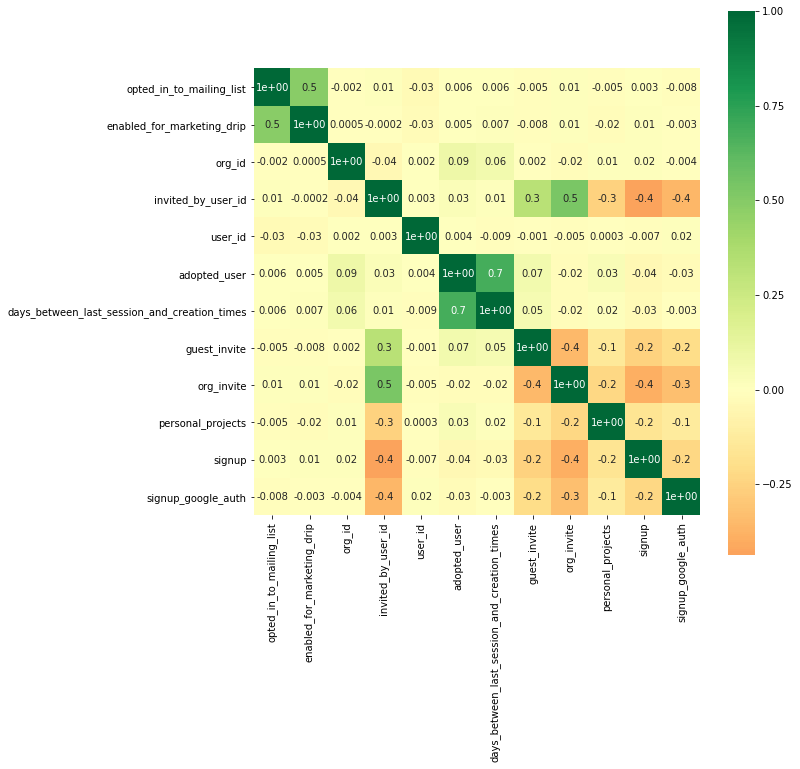

In [18]:
#Create correlation heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(model_df.corr(), center=0, square=True, annot=True, fmt='.01', cmap="RdYlGn")
ax.set_ylim(12.5-0.5, -0.5)

plt.show()

In [19]:
#Prepare train and test datasets and run predictive model on 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)

X_scale_train = preprocessing.scale(X_train)
X_scale_test = preprocessing.scale(X_test)

svc = SVC(kernel = 'linear', random_state=42, probability=True, gamma='auto')

result = svc.fit(X_scale_train, y_train)

prediction_test = svc.predict(X_scale_test)

print(metrics.accuracy_score(y_test, prediction_test))

0.9669796050501781


In [20]:
coefficient_df = pd.DataFrame(result.coef_[0,:].tolist(), list(X.columns)).reset_index()
coefficient_df.rename(columns={"index":"features", 0:"coefficients"}, inplace=True)
coefficient_df.sort_values("coefficients", ascending=False)

,features,coefficients
4,days_between_last_session_and_creation_times,10.090408
3,invited_by_user_id,0.106352
0,opted_in_to_mailing_list,0.046407
7,personal_projects,0.032252
8,signup,0.025121
2,org_id,0.016345
9,signup_google_auth,0.009270
5,guest_invite,-0.015435
1,enabled_for_marketing_drip,-0.028325
6,org_invite,-0.035411


# Takeaways
The main takeaways from this dataset of adopted users are the following:
1. Higher number of days between a users last session and their account creation date correlated with user adoption.
2. Invitations from other users (especially specific users) correlated with user adoption.
3. Users who opted in the mailing list to this app/website/product/service correlated with user adoption.
4. Users who created an account for personal projects correlated with user adoption.
5. Users who signup as members and not guests correlated with user adoption.
6. Invitations from organization (and particular organization) correlated with user adoption.